In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [152]:
roman = pd.read_csv('./model_data.csv', index_col=0)

Saving URLTitle for later exploration and saving ItemID as a future reference for new data

In [153]:
urltitles = roman['URLTitle'].copy()
roman = roman.drop('URLTitle', axis=1)

item_ids = roman['itemId'].copy()
roman = roman.drop('itemId', axis=1)

0.975    691.36775
Name: current_price, dtype: float64


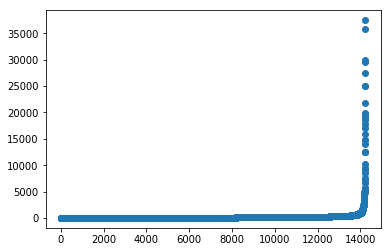

In [154]:
print(roman['current_price'].quantile([0.975]))
#dropping outliers above the 97.5th percentile
plt.scatter(np.arange(roman.shape[0]), roman.current_price.sort_values())
roman = roman.drop(list(roman.loc[(roman['current_price'].quantile([0.975]).values[0] 
                < roman['current_price'])].index), axis=0)

In [155]:
#dropping values with current prices less than $1
roman = roman.drop(list(roman.loc[roman['current_price'] < 1].index), axis=0)

In [156]:
y = np.log(roman['current_price'].values) #using log current price
X = roman.drop('current_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
lr = LinearRegression()

In [157]:
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [158]:
lr.score(X_test, y_test)

0.5989658053196101

In [159]:
preds = lr.predict(X_test)

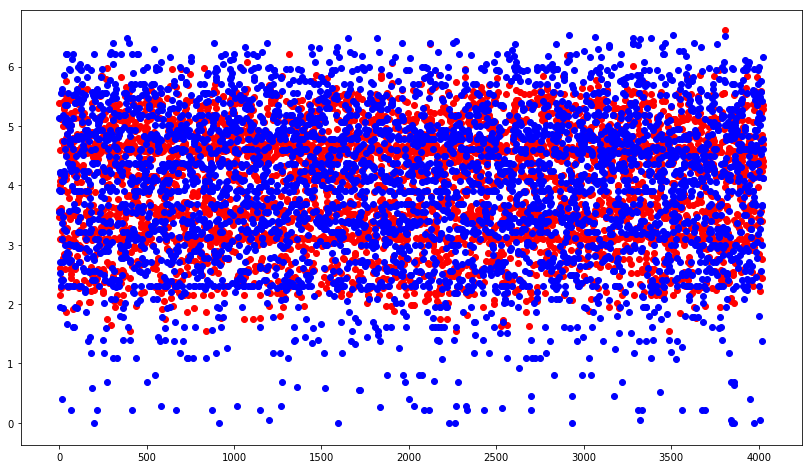

In [161]:
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(np.arange(preds.shape[0]), preds, c='r')
plt.scatter(np.arange(y_test.shape[0]), y_test, c='b')

In [172]:
pd.DataFrame(dict(zip(X.columns, np.abs(lr.coef_))), index=np.arange(1)).T.sort_values(by=0,ascending=False)

,0
bestOfferEnabled,0.398370
topRatedListing,0.218728
Auction,0.208400
silver,0.206756
expeditedShipping,0.134527
seller_in_us,0.119061
Less_than_week,0.104725
high_quality_words,0.095659
constantius i,0.088787
Free,0.085417
